In [1]:
%pip install category_encoders
%pip install pandas matplotlib seaborn scikit-learn imblearn pickle numpy 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from category_encoders import CatBoostEncoder



import pickle
from imblearn.under_sampling import RandomUnderSampler

ModuleNotFoundError: No module named 'seaborn'

In [107]:
#Visualizar todas as colunas
pd.set_option('display.max_columns', None)

In [108]:
#df = pd.read_csv('/content/git_data.csv')
df = pd.read_csv('/content/drive/MyDrive/git_data.csv')

<ipython-input-108-f043bc67dfca>:2: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/git_data.csv')


In [109]:
#Só queria ver a variação máxima que tinha
df_sorted = df.sort_values(by='event_stars', ascending=False)
df_sorted

,user,event_id,event_type,repo,event_url,event_watchs,event_stars,event_forks,event_issues,event_isfork,event_projects,event_downloads,event_wiki,event_pages,event_discussions,date_,time,language_1,lang_count_1,language_2,lang_count_2,language_3,lang_count_3
33195,mateopal-nu,42311247633,WatchEvent,free-programming-books,https://github.com/EbookFoundation/free-progra...,9778.0,334471.0,61212.0,37.0,False,False,True,False,True,False,2024-09-26,19:50:07,NaN,NaN,NaN,NaN,NaN,NaN
39075,mateopal-nu,42311247633,WatchEvent,free-programming-books,https://github.com/EbookFoundation/free-progra...,9778.0,334471.0,61212.0,37.0,False,False,True,False,True,False,2024-09-26,19:50:07,NaN,NaN,NaN,NaN,NaN,NaN
35985,mateopal-nu,42311247633,WatchEvent,free-programming-books,https://github.com/EbookFoundation/free-progra...,9778.0,334471.0,61212.0,37.0,False,False,True,False,True,False,2024-09-26,19:50:07,NaN,NaN,NaN,NaN,NaN,NaN
30555,mateopal-nu,42311247633,WatchEvent,free-programming-books,https://github.com/EbookFoundation/free-progra...,9778.0,334471.0,61212.0,37.0,False,False,True,False,True,False,2024-09-26,19:50:07,NaN,NaN,NaN,NaN,NaN,NaN
27975,mateopal-nu,42311247633,WatchEvent,free-programming-books,https://github.com/EbookFoundation/free-progra...,9778.0,334471.0,61212.0,37.0,False,False,True,False,True,False,2024-09-26,19:50:07,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45434,direwolf-github,42311360231,CreateEvent,ephemeral-ci-326cfc2f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-26,19:54:10,NaN,NaN,NaN,NaN,NaN,NaN
45438,direwolf-github,42311360190,PushEvent,ephemeral-ci-5079f9ae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-26,19:54:10,NaN,NaN,NaN,NaN,NaN,NaN
45443,direwolf-github,42311360147,PushEvent,ephemeral-ci-c56c561e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-26,19:54:10,NaN,NaN,NaN,NaN,NaN,NaN
45542,tanishzamn,42311409425,PushEvent,ResumeWebsite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-26,19:55:59,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
#Filtrei as event_stars em um intervalo de 0 a 1000
df_filtrado = df.query('0 <= event_stars <= 1000')
df_sorted = df_filtrado.sort_values(by='event_stars', ascending=False)
df_sorted

,user,event_id,event_type,repo,event_url,event_watchs,event_stars,event_forks,event_issues,event_isfork,event_projects,event_downloads,event_wiki,event_pages,event_discussions,date_,time,language_1,lang_count_1,language_2,lang_count_2,language_3,lang_count_3
41821,ekulabuhov,42313991732,WatchEvent,cortex-debug,https://github.com/Marus/cortex-debug,30.0,993.0,238.0,66.0,False,True,True,True,False,False,2024-09-26,21:40:00,TypeScript,935209,JavaScript,10809,Python,4032.0
39485,rohinb2,42311474070,CreateEvent,runhouse,https://github.com/run-house/runhouse,9.0,964.0,37.0,62.0,False,True,True,True,False,False,2024-09-26,19:58:27,Python,1242170.0,HCL,11440.0,Dockerfile,9532.0
45665,rohinb2,42311474070,CreateEvent,runhouse,https://github.com/run-house/runhouse,9.0,964.0,37.0,62.0,False,True,True,True,False,False,2024-09-26,19:58:27,Python,1242170,HCL,11440,Dockerfile,9532.0
36395,rohinb2,42311474070,CreateEvent,runhouse,https://github.com/run-house/runhouse,9.0,964.0,37.0,62.0,False,True,True,True,False,False,2024-09-26,19:58:27,Python,1242170.0,HCL,11440.0,Dockerfile,9532.0
39437,NotWhiteRice,42311441684,IssuesEvent,GT-New-Horizons-Modpack,https://github.com/GTNewHorizons/GT-New-Horizo...,59.0,960.0,297.0,876.0,False,True,True,False,False,True,2024-09-26,19:57:13,Python,5929.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18119,abdul-rehman729,42306703509,PushEvent,hosted-files,https://github.com/abdul-rehman729/hosted-files,1.0,0.0,0.0,0.0,False,True,True,True,True,False,2024-09-26,17:14:36,NaN,NaN,NaN,NaN,NaN,NaN
18118,github-actions[bot],42306703494,PushEvent,refactored-barnacle,https://github.com/gainfisheries/refactored-ba...,1.0,0.0,0.0,0.0,False,True,True,True,False,False,2024-09-26,17:14:36,NaN,NaN,NaN,NaN,NaN,NaN
18113,pull[bot],42306703572,PullRequestEvent,yunikorn-web,https://github.com/chenyulin0719/yunikorn-web,0.0,0.0,0.0,0.0,True,True,True,False,False,False,2024-09-26,17:14:36,TypeScript,224573.0,HTML,56572.0,SCSS,41427.0
18112,github-actions[bot],42306703568,PushEvent,bvdfer,https://github.com/yunoub/bvdfer,1.0,0.0,0.0,0.0,False,True,True,True,False,False,2024-09-26,17:14:36,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
# Definir os intervalos e os rótulos
bins = [0, 200, 400, 600, 800, 1000]
labels = [0, 1, 2, 3, 4]

# Criar uma nova coluna com os valores categorizados
df_filtrado['event_stars_category'] = pd.cut(df['event_stars'], bins=bins, labels=labels, right=True, include_lowest=True)

# Confirmando se a nova classe foi colocada corretamente
df_sorted = df_filtrado.sort_values(by='event_stars', ascending=False)
df_sorted

<ipython-input-111-d0e9ecf406b7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['event_stars_category'] = pd.cut(df['event_stars'], bins=bins, labels=labels, right=True, include_lowest=True)


,user,event_id,event_type,repo,event_url,event_watchs,event_stars,event_forks,event_issues,event_isfork,event_projects,event_downloads,event_wiki,event_pages,event_discussions,date_,time,language_1,lang_count_1,language_2,lang_count_2,language_3,lang_count_3,event_stars_category
41821,ekulabuhov,42313991732,WatchEvent,cortex-debug,https://github.com/Marus/cortex-debug,30.0,993.0,238.0,66.0,False,True,True,True,False,False,2024-09-26,21:40:00,TypeScript,935209,JavaScript,10809,Python,4032.0,4
39485,rohinb2,42311474070,CreateEvent,runhouse,https://github.com/run-house/runhouse,9.0,964.0,37.0,62.0,False,True,True,True,False,False,2024-09-26,19:58:27,Python,1242170.0,HCL,11440.0,Dockerfile,9532.0,4
45665,rohinb2,42311474070,CreateEvent,runhouse,https://github.com/run-house/runhouse,9.0,964.0,37.0,62.0,False,True,True,True,False,False,2024-09-26,19:58:27,Python,1242170,HCL,11440,Dockerfile,9532.0,4
36395,rohinb2,42311474070,CreateEvent,runhouse,https://github.com/run-house/runhouse,9.0,964.0,37.0,62.0,False,True,True,True,False,False,2024-09-26,19:58:27,Python,1242170.0,HCL,11440.0,Dockerfile,9532.0,4
39437,NotWhiteRice,42311441684,IssuesEvent,GT-New-Horizons-Modpack,https://github.com/GTNewHorizons/GT-New-Horizo...,59.0,960.0,297.0,876.0,False,True,True,False,False,True,2024-09-26,19:57:13,Python,5929.0,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18119,abdul-rehman729,42306703509,PushEvent,hosted-files,https://github.com/abdul-rehman729/hosted-files,1.0,0.0,0.0,0.0,False,True,True,True,True,False,2024-09-26,17:14:36,NaN,NaN,NaN,NaN,NaN,NaN,0
18118,github-actions[bot],42306703494,PushEvent,refactored-barnacle,https://github.com/gainfisheries/refactored-ba...,1.0,0.0,0.0,0.0,False,True,True,True,False,False,2024-09-26,17:14:36,NaN,NaN,NaN,NaN,NaN,NaN,0
18113,pull[bot],42306703572,PullRequestEvent,yunikorn-web,https://github.com/chenyulin0719/yunikorn-web,0.0,0.0,0.0,0.0,True,True,True,False,False,False,2024-09-26,17:14:36,TypeScript,224573.0,HTML,56572.0,SCSS,41427.0,0
18112,github-actions[bot],42306703568,PushEvent,bvdfer,https://github.com/yunoub/bvdfer,1.0,0.0,0.0,0.0,False,True,True,True,False,False,2024-09-26,17:14:36,NaN,NaN,NaN,NaN,NaN,NaN,0


In [112]:
#Visualizando a quantidade de dados
df_filtrado.shape

(42538, 24)

In [113]:
#Convertendo a nova classe em int64 para poder ser pré-processada
df_filtrado['event_stars_category'] = df_filtrado['event_stars_category'].astype(int)
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42538 entries, 0 to 45779
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user                  42538 non-null  object 
 1   event_id              42538 non-null  int64  
 2   event_type            42538 non-null  object 
 3   repo                  42538 non-null  object 
 4   event_url             42538 non-null  object 
 5   event_watchs          42538 non-null  float64
 6   event_stars           42538 non-null  float64
 7   event_forks           42538 non-null  float64
 8   event_issues          42538 non-null  float64
 9   event_isfork          42538 non-null  object 
 10  event_projects        42538 non-null  object 
 11  event_downloads       42538 non-null  object 
 12  event_wiki            42538 non-null  object 
 13  event_pages           42538 non-null  object 
 14  event_discussions     42538 non-null  object 
 15  date_                 42

<ipython-input-113-d62864d8b9a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['event_stars_category'] = df_filtrado['event_stars_category'].astype(int)


##Árvore de Decisão

In [114]:
#Dados escolhidos para alimentar o modelo
X = df_filtrado[['event_watchs', 'event_forks', 'event_issues', 'event_isfork','event_projects',  'event_downloads', 'event_wiki','event_pages', 'event_discussions','language_1', 'language_2', 'language_3']]

y = df_filtrado['event_stars_category']

In [115]:
# Identificar as colunas categóricas e contínuas
categorical_features = ['language_1', 'language_2', 'language_3']
continuous_features = ['event_watchs', 'event_forks', 'event_issues', 'event_isfork','event_projects',  'event_downloads', 'event_wiki','event_pages', 'event_discussions']

# Pré-processador para variáveis contínuas
continuous_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Pré-processador para variáveis categóricas
categorical_transformer = Pipeline(steps=[
    ('encoder', CatBoostEncoder())
])

# Combinar os pré-processadores usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', continuous_transformer, continuous_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Criar a pipeline completa
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])




In [116]:
#Trocando dados nulos por 0
X = X.fillna(0)
y = y.fillna(0)

#Separando os dados de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['event_watchs',
                                                   'event_forks',
                                                   'event_issues',
                                                   'event_isfork',
                                                   'event_projects',
                                                   'event_downloads',
                                                   'event_wiki', 'event_pages',
                                                   'event_discussions']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   CatBoostEncoder())]),
                                                  ['language_1', 'language_2',
                                                   'language_3'])])),
                ('classifier', DecisionTreeClassifier())])

In [117]:
#Realizando a previsão
y_pred = pipeline.predict(X_test)

In [118]:
#Analisando as métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average="micro")

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Revocação:", recall)
print("F1-Score:", f1)

Acurácia: 0.9970224102805203
Precisão: 0.9970224102805203
Revocação: 0.9970224102805203
F1-Score: 0.9970224102805203


In [119]:
#Devido a valores extremamente altos, realizamos a validação cruzada pra tentar ver se ocorreu overfitting
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print("AUC média (Validação Cruzada):", scores.mean())
print("Desvio padrão AUC:", scores.std())

AUC média (Validação Cruzada): 0.9962385678575437
Desvio padrão AUC: 0.0011566589899835481


In [120]:
#Pra nossa surpresa o gráfico de curva de aprendizado estava melhor que o gráfico com os dados balanceados que será mostrado posteriormente.
def plot_learning_curve(model, X, y, cv=5):
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Acurácia Treinamento', color='blue')
    plt.plot(train_sizes, val_scores_mean, label='Acurácia Validação', color='green')
    plt.title('Curvas de Aprendizado')
    plt.xlabel('Tamanho do Conjunto de Treino')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid()
    plt.show()

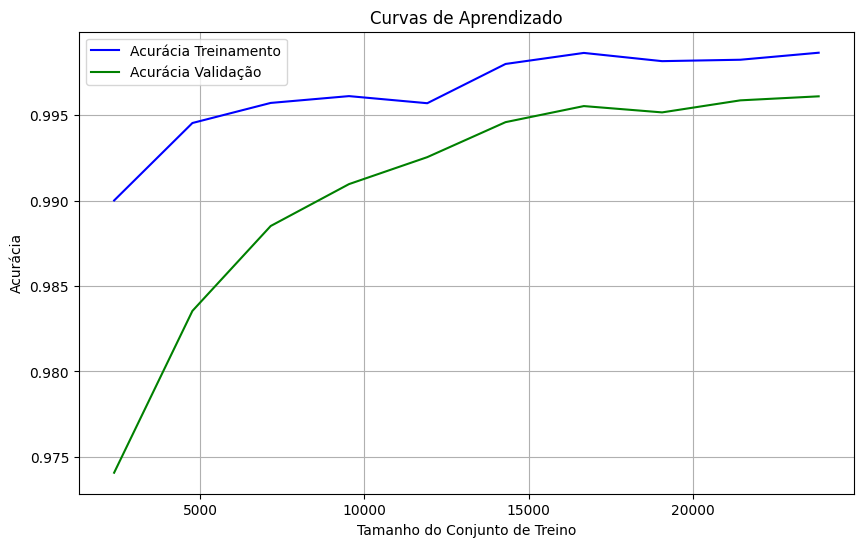

In [121]:
plot_learning_curve(pipeline, X_train, y_train, cv=5)

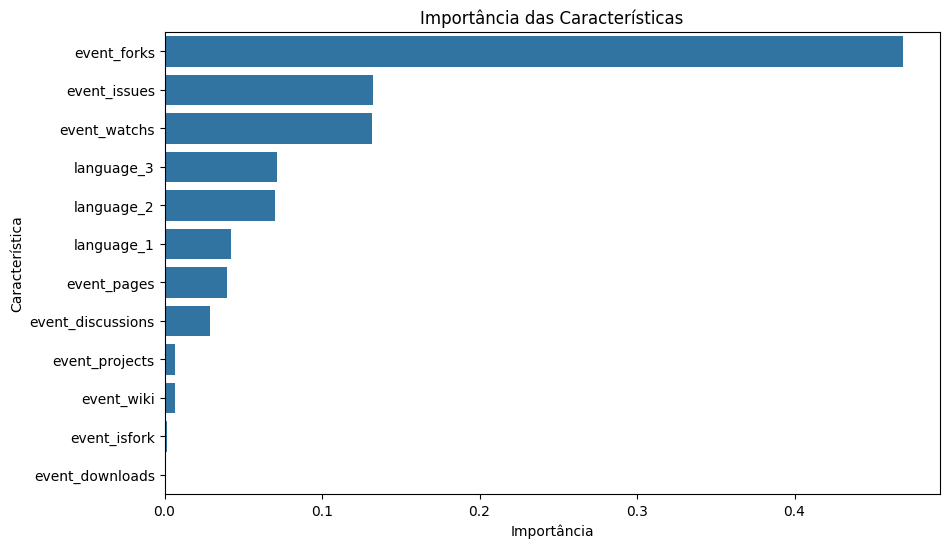

In [122]:
#Extrair quais features seriam mais impactantes
# Extrair o modelo treinado da pipeline
model = pipeline.named_steps['classifier']

# Extrair a importância das características
importances = model.feature_importances_

# Obter os nomes das características após o pré-processamento
feature_names = continuous_features + categorical_features  # Simplesmente concatenar as listas
preprocessed_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_features)

# Combinar os nomes das características contínuas e categóricas
final_feature_names = continuous_features + list(preprocessed_feature_names)

# Criar um DataFrame para visualizar as importâncias
feature_importance_df = pd.DataFrame({
    'feature': final_feature_names,
    'importance': importances
})

# Ordenar por importância
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Visualizar a importância das características
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Importância das Características')
plt.xlabel('Importância')
plt.ylabel('Característica')
plt.show()



In [123]:
#Salvamos o modelo pra testarmos e termos certeza se era consistente ou overfitting
filename = 'pipeline_modelo_suspeita_overfitting.pkl'
pickle.dump(pipeline, open(filename, 'wb'))

In [124]:
#Visualizar o quão desbalanceado estava
df_filtrado['event_stars_category'].value_counts()

,count
event_stars_category,
0,41158
1,544
2,371
3,326
4,139


In [125]:
# Inicializa o RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Aplica o undersampling no conjunto de dados
X_resampled, y_resampled = rus.fit_resample(df_filtrado.drop('event_stars_category', axis=1), df_filtrado['event_stars_category'])

# Cria um novo DataFrame com os dados balanceados
df_balanced = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['event_stars_category'])], axis=1)

In [126]:
#Nova quantia de dados
df_balanced.shape

(695, 24)

In [127]:
#Dados balanceados
df_balanced['event_stars_category'].value_counts()

,count
event_stars_category,
0,139
1,139
2,139
3,139
4,139


In [128]:
X = df_balanced[['event_watchs', 'event_forks', 'event_issues', 'event_isfork','event_projects',  'event_downloads', 'event_wiki','event_pages', 'event_discussions','language_1', 'language_2', 'language_3']]
y = df_balanced['event_stars_category']
X

,event_watchs,event_forks,event_issues,event_isfork,event_projects,event_downloads,event_wiki,event_pages,event_discussions,language_1,language_2,language_3
28811,1.0,0.0,0.0,False,True,True,False,True,False,TeX,HTML,NaN
11052,1.0,0.0,0.0,False,True,True,True,False,False,NaN,NaN,NaN
164,1.0,0.0,0.0,False,True,True,True,False,False,TypeScript,Svelte,PLpgSQL
9053,0.0,0.0,0.0,True,True,True,True,False,False,C,C++,Makefile
21951,1.0,0.0,0.0,False,True,True,True,False,False,Python,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
45262,18.0,187.0,434.0,False,False,True,False,False,True,Rust,Noir,C++
45367,8.0,65.0,52.0,False,True,True,True,False,True,TypeScript,NaN,NaN
45617,59.0,297.0,876.0,False,True,True,False,False,True,Python,NaN,NaN
45645,8.0,33.0,5.0,False,True,True,True,True,False,C#,PowerShell,NaN


In [129]:
# Identificar as colunas categóricas e contínuas
categorical_features = ['language_1', 'language_2', 'language_3']
continuous_features = ['event_watchs', 'event_forks', 'event_issues', 'event_isfork','event_projects',  'event_downloads', 'event_wiki','event_pages', 'event_discussions']

# Pré-processador para variáveis contínuas
continuous_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Pré-processador para variáveis categóricas
categorical_transformer = Pipeline(steps=[
    ('encoder', CatBoostEncoder())
])

# Combinar os pré-processadores usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', continuous_transformer, continuous_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Criar a pipeline completa
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])




In [130]:
X = X.fillna(0)
y = y.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['event_watchs',
                                                   'event_forks',
                                                   'event_issues',
                                                   'event_isfork',
                                                   'event_projects',
                                                   'event_downloads',
                                                   'event_wiki', 'event_pages',
                                                   'event_discussions']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   CatBoostEncoder())]),
                                                  ['language_1', 'language_2',
                                                   'language_3'])])),
                ('classifier', DecisionTreeClassifier())])

In [131]:
y_pred = pipeline.predict(X_test)

In [132]:
#Deu valores muito bons levando em conta que só foi feito pré-processamento e balanceamento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average="micro")

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Revocação:", recall)
print("F1-Score:", f1)

Acurácia: 0.8851674641148325
Precisão: 0.8851674641148325
Revocação: 0.8851674641148325
F1-Score: 0.8851674641148325


In [133]:
#Validação cruzada novamente
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print("AUC média (Validação Cruzada):", scores.mean())
print("Desvio padrão AUC:", scores.std())

AUC média (Validação Cruzada): 0.8723753418893331
Desvio padrão AUC: 0.033149780950451374


In [134]:
#Pra nossa surpresa o gráfico de curva de aprendizado estava melhor que o gráfico com os dados balanceados que será mostrado posteriormente.
def plot_learning_curve(model, X, y, cv=5):
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Acurácia Treinamento', color='blue')
    plt.plot(train_sizes, val_scores_mean, label='Acurácia Validação', color='green')
    plt.title('Curvas de Aprendizado')
    plt.xlabel('Tamanho do Conjunto de Treino')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid()
    plt.show()

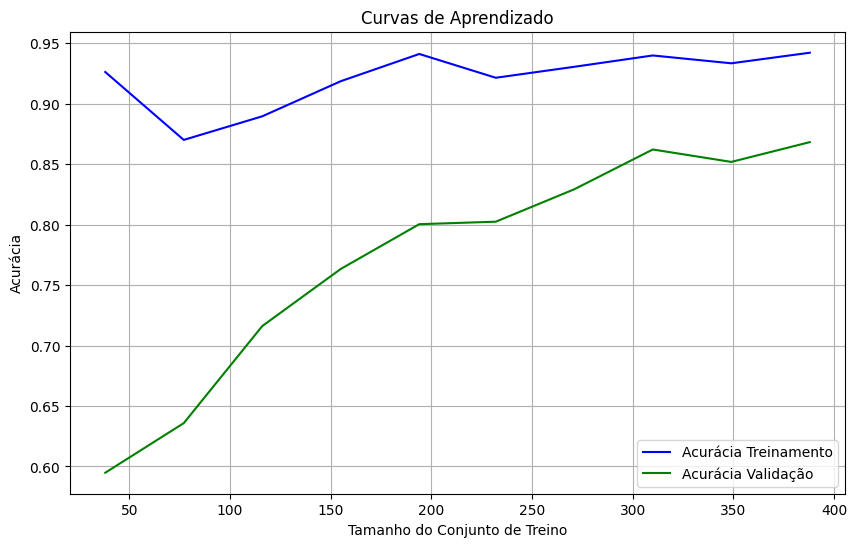

In [135]:
plot_learning_curve(pipeline, X_train, y_train, cv=5)

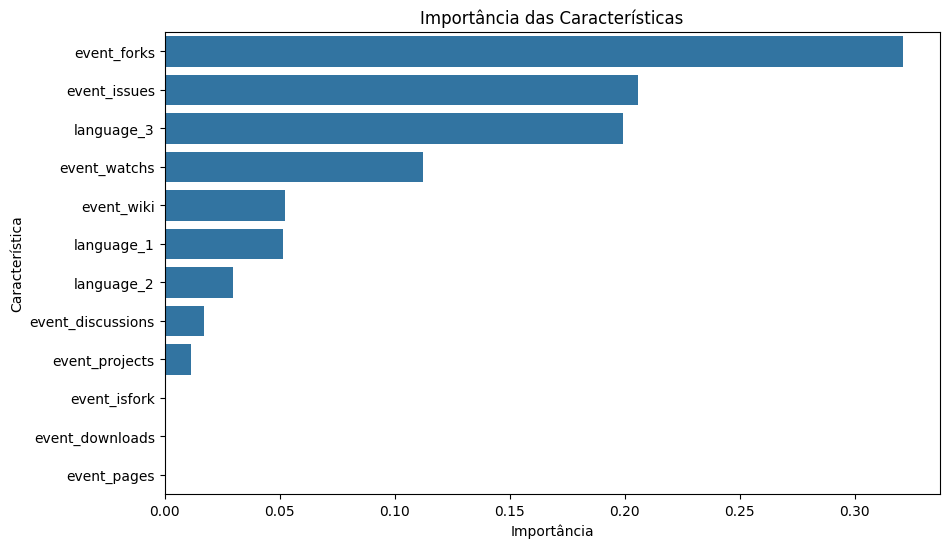

In [136]:

# Extrair o modelo treinado da pipeline
model = pipeline.named_steps['classifier']

# Extrair a importância das características
importances = model.feature_importances_

# Obter os nomes das características após o pré-processamento
feature_names = continuous_features + categorical_features  # Simplesmente concatenar as listas
preprocessed_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_features)

# Combinar os nomes das características contínuas e categóricas
final_feature_names = continuous_features + list(preprocessed_feature_names)

# Criar um DataFrame para visualizar as importâncias
feature_importance_df = pd.DataFrame({
    'feature': final_feature_names,
    'importance': importances
})

# Ordenar por importância
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Visualizar a importância das características
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Importância das Características')
plt.xlabel('Importância')
plt.ylabel('Característica')
plt.show()



In [137]:


def plot_learning_curve(model, X, y, cv=5):
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=cv, n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Acurácia Treinamento', color='blue')
    plt.plot(train_sizes, val_scores_mean, label='Acurácia Validação', color='green')
    plt.title('Curvas de Aprendizado')
    plt.xlabel('Tamanho do Conjunto de Treino')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid()
    plt.show()

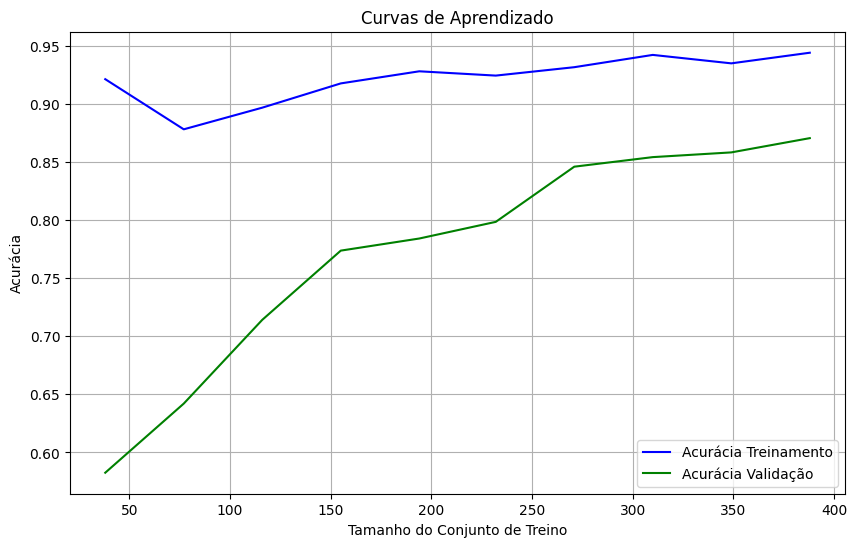

In [138]:
#Pra nossa surpresa esse gráfico estava pior que o da suspeita de overfitting
plot_learning_curve(pipeline, X_train, y_train, cv=5)

In [139]:
# Salvamos o modelo pra testar e comparar
filename = 'pipeline_modelo_balanceado.pkl'
pickle.dump(pipeline, open(filename, 'wb'))

##Aqui iremos testar com dados novos, que não foram apresentados ao modelo

In [140]:
#Estamos selecionando as features
df_test = pd.read_csv('/content/git_data2.csv')
df_test_s_star = df_test[['event_watchs', 'event_forks', 'event_issues', 'event_isfork','event_projects',  'event_downloads', 'event_wiki','event_pages', 'event_discussions','language_1', 'language_2', 'language_3']]
df_test_s_star

,event_watchs,event_forks,event_issues,event_isfork,event_projects,event_downloads,event_wiki,event_pages,event_discussions,language_1,language_2,language_3
0,2.0,0.0,0.0,False,False,True,False,False,False,TypeScript,JavaScript,Shell
1,1.0,0.0,48.0,False,True,True,True,False,False,Python,HTML,NaN
2,1.0,0.0,0.0,False,True,True,False,False,False,JavaScript,CSS,HTML
3,10.0,0.0,2.0,False,True,True,True,False,False,Shell,Dockerfile,NaN
4,8.0,3.0,33.0,False,True,True,True,False,True,TypeScript,Dockerfile,Shell
...,...,...,...,...,...,...,...,...,...,...,...,...
1034,1.0,0.0,0.0,False,True,True,True,False,False,NaN,NaN,NaN
1035,40.0,445.0,294.0,False,True,True,False,False,True,HTML,Svelte,Rust
1036,7.0,12.0,54.0,False,True,True,True,False,False,Java,TypeScript,FreeMarker
1037,70.0,406.0,86.0,False,True,True,True,False,False,Java,Vue,JavaScript


In [141]:
# Definir os intervalos e os rótulos
bins = [0, 200, 400, 600, 800, np.inf]
labels = [0, 1, 2, 3, 4]

# Criar uma nova coluna com os valores categorizados
df_test['event_stars_category'] = pd.cut(df['event_stars'], bins=bins, labels=labels, right=True, include_lowest=True)

# Exibir o DataFrame
df_sorted = df_test.sort_values(by='event_stars', ascending=True)
df_sorted

,user,event_id,event_type,repo,event_url,event_watchs,event_stars,event_forks,event_issues,event_isfork,event_projects,event_downloads,event_wiki,event_pages,event_discussions,date_,time,language_1,lang_count_1,language_2,lang_count_2,language_3,lang_count_3,event_stars_category
0,stainless-app[bot],42271873304,CreateEvent,node-sdk,https://github.com/julep-ai/node-sdk,2.0,0.0,0.0,0.0,False,False,True,False,False,False,2024-09-25,19:52:22,TypeScript,346955.0,JavaScript,8918.0,Shell,6442.0,0
618,spanol,42278313516,PullRequestEvent,portfolio-2024,https://github.com/spanol/portfolio-2024,1.0,0.0,0.0,0.0,False,True,True,True,False,False,2024-09-26,01:21:57,Vue,16423.0,JavaScript,3081.0,HTML,779.0,0
619,thanetate,42278313510,PushEvent,mapo,https://github.com/bensivo/mapo,1.0,0.0,0.0,43.0,False,True,True,True,False,False,2024-09-26,01:21:57,TypeScript,138367.0,Go,32974.0,Shell,10619.0,0
620,plutointegtestuser,42278313517,IssueCommentEvent,jsNPMPackage,https://github.com/plutointegtestuser/jsNPMPac...,1.0,0.0,0.0,20.0,False,True,True,True,False,False,2024-09-26,01:21:57,NaN,NaN,NaN,NaN,NaN,NaN,0
622,github-actions[bot],42278313492,PushEvent,AdrianCarvalhoo,https://github.com/AdrianCarvalhoo/AdrianCarva...,1.0,0.0,0.0,0.0,False,True,True,True,False,False,2024-09-26,01:21:57,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,lhzyuxiang,42278248841,WatchEvent,yt-dlp,https://github.com/yt-dlp/yt-dlp,503.0,83281.0,6496.0,1714.0,False,True,True,True,True,True,2024-09-26,01:17:54,Python,9661061.0,Makefile,7825.0,Shell,551.0,4
952,lhzyuxiang,42278248841,WatchEvent,yt-dlp,https://github.com/yt-dlp/yt-dlp,503.0,83281.0,6496.0,1714.0,False,True,True,True,True,True,2024-09-26,01:17:54,Python,9661061.0,Makefile,7825.0,Shell,551.0,4
592,lhzyuxiang,42278248841,WatchEvent,yt-dlp,https://github.com/yt-dlp/yt-dlp,503.0,83281.0,6496.0,1714.0,False,True,True,True,True,True,2024-09-26,01:17:54,Python,9661061.0,Makefile,7825.0,Shell,551.0,4
860,Enc00re,42307648822,WatchEvent,awesome-selfhosted,https://github.com/awesome-selfhosted/awesome-...,2534.0,196106.0,9500.0,0.0,False,False,True,False,False,False,2024-09-26,17:45:36,NaN,NaN,NaN,NaN,NaN,NaN,4


In [142]:
df_test_s_star = df_test_s_star.fillna(0)

In [143]:
# Carregar a pipeline ou modelo salvo
filename = 'pipeline_modelo_suspeita_overfitting.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

In [144]:
y_pred = loaded_model.predict(df_test_s_star)

In [145]:
df_test['event_stars_category'] = df_test['event_stars_category'].astype(int)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user                  1039 non-null   object 
 1   event_id              1039 non-null   int64  
 2   event_type            1039 non-null   object 
 3   repo                  1039 non-null   object 
 4   event_url             1039 non-null   object 
 5   event_watchs          1039 non-null   float64
 6   event_stars           1039 non-null   float64
 7   event_forks           1039 non-null   float64
 8   event_issues          1039 non-null   float64
 9   event_isfork          1039 non-null   bool   
 10  event_projects        1039 non-null   bool   
 11  event_downloads       1039 non-null   bool   
 12  event_wiki            1039 non-null   bool   
 13  event_pages           1039 non-null   bool   
 14  event_discussions     1039 non-null   bool   
 15  date_                

In [146]:
#Mesmo com dados novos perfomou muito bem, decidimos usa-lo pois até onde analisamos não tem overfitting


accuracy = accuracy_score(df_test['event_stars_category'], y_pred)
precision = precision_score(df_test['event_stars_category'], y_pred, average="micro")
recall = recall_score(df_test['event_stars_category'], y_pred, average="micro")
f1 = f1_score(df_test['event_stars_category'], y_pred, average="micro")

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Revocação:", recall)
print("F1-Score:", f1)

Acurácia: 0.9557266602502407
Precisão: 0.9557266602502407
Revocação: 0.9557266602502407
F1-Score: 0.9557266602502407


In [147]:
# Carregar a pipeline ou modelo salvo
filename = 'pipeline_modelo_balanceado.pkl'
loaded_model2 = pickle.load(open(filename, 'rb'))

In [148]:
y_pred2 = loaded_model2.predict(df_test_s_star)

In [149]:
accuracy = accuracy_score(df_test['event_stars_category'], y_pred2)
precision = precision_score(df_test['event_stars_category'], y_pred2, average="micro")
recall = recall_score(df_test['event_stars_category'], y_pred2, average="micro")
f1 = f1_score(df_test['event_stars_category'], y_pred2, average="micro")

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Revocação:", recall)
print("F1-Score:", f1)

Acurácia: 0.8941289701636189
Precisão: 0.8941289701636189
Revocação: 0.8941289701636189
F1-Score: 0.8941289701636189


##Será o modelo definitivo sem a presença das features menos importantes

In [150]:
# foi retirado event_downloads, event_isfork e event_wiki

X = df_filtrado[['event_watchs', 'event_forks', 'event_issues','event_projects','event_pages', 'event_discussions','language_1', 'language_2', 'language_3']]

y = df_filtrado['event_stars_category']

In [151]:
# Identificar as colunas categóricas e contínuas
categorical_features = ['language_1', 'language_2', 'language_3']
continuous_features = ['event_watchs', 'event_forks', 'event_issues','event_projects','event_pages', 'event_discussions']

# Pré-processador para variáveis contínuas
continuous_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Pré-processador para variáveis categóricas
categorical_transformer = Pipeline(steps=[
    ('encoder', CatBoostEncoder())
])

# Combinar os pré-processadores usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', continuous_transformer, continuous_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Criar a pipeline completa
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])




In [152]:
X = X.fillna(0)
y = y.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['event_watchs',
                                                   'event_forks',
                                                   'event_issues',
                                                   'event_projects',
                                                   'event_pages',
                                                   'event_discussions']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   CatBoostEncoder())]),
                                                  ['language_1', 'language_2',
                                                   'language_3'])])),
                ('classifier', DecisionTreeClassifier())])

In [153]:
y_pred = pipeline.predict(X_test)

In [154]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average="micro")

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Revocação:", recall)
print("F1-Score:", f1)

Acurácia: 0.996708979783733
Precisão: 0.996708979783733
Revocação: 0.996708979783733
F1-Score: 0.996708979783733


In [155]:

scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print("AUC média (Validação Cruzada):", scores.mean())
print("Desvio padrão AUC:", scores.std())

AUC média (Validação Cruzada): 0.9959027269103006
Desvio padrão AUC: 0.0010220556031155154


In [156]:
def plot_learning_curve(model, X, y, cv=5):
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=cv, n_jobs=-1,train_sizes=np.linspace(0.1, 1.0, 10),scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Acurácia Treinamento', color='blue')
    plt.plot(train_sizes, val_scores_mean, label='Acurácia Validação', color='green')
    plt.title('Curvas de Aprendizado')
    plt.xlabel('Tamanho do Conjunto de Treino')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid()
    plt.show()

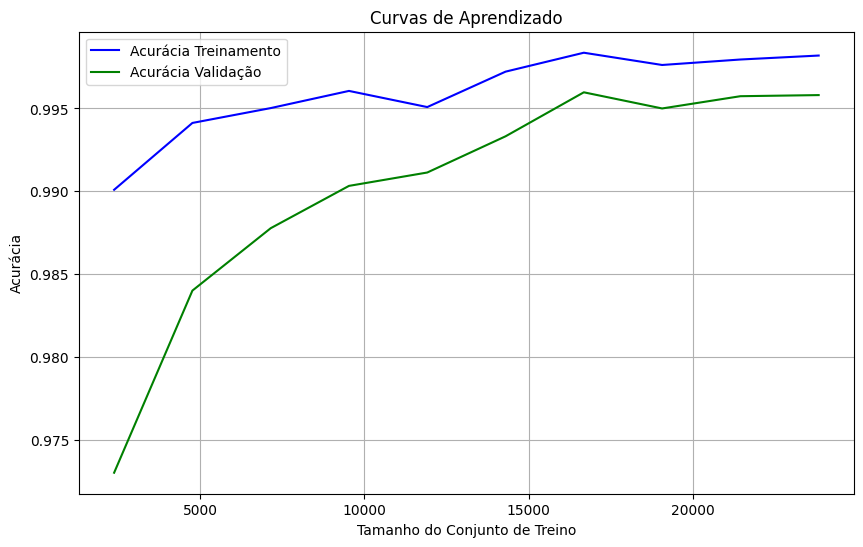

In [157]:
plot_learning_curve(pipeline, X_train, y_train, cv=5)

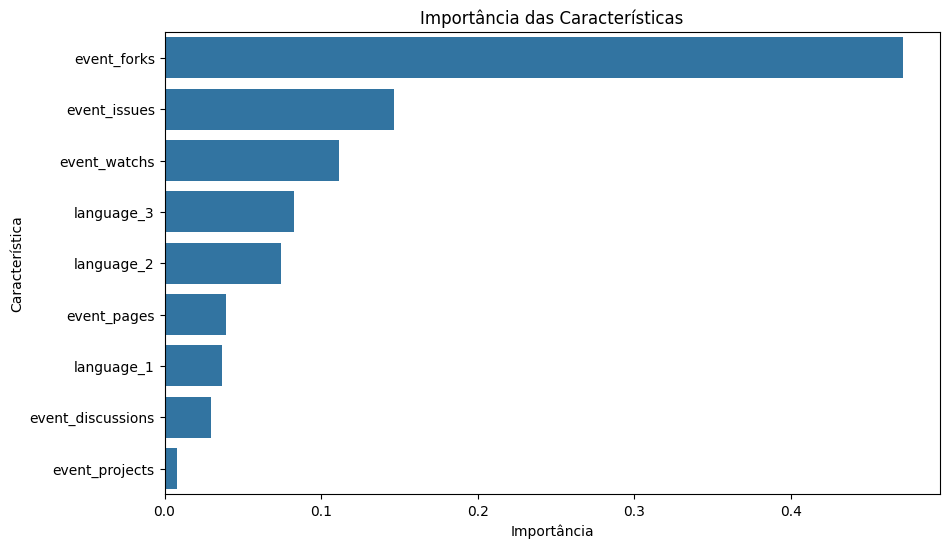

In [158]:

# Extrair o modelo treinado da pipeline
model = pipeline.named_steps['classifier']

# Extrair a importância das características
importances = model.feature_importances_

# Obter os nomes das características após o pré-processamento
feature_names = continuous_features + categorical_features  # Simplesmente concatenar as listas
preprocessed_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_features)

# Combinar os nomes das características contínuas e categóricas
final_feature_names = continuous_features + list(preprocessed_feature_names)

# Criar um DataFrame para visualizar as importâncias
feature_importance_df = pd.DataFrame({
    'feature': final_feature_names,
    'importance': importances
})

# Ordenar por importância
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Visualizar a importância das características
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Importância das Características')
plt.xlabel('Importância')
plt.ylabel('Característica')
plt.show()



In [159]:
# Salvamos o modelo definitivo pra usar no streamlit
filename = 'pipeline_modelo_definitivo.pkl'
pickle.dump(pipeline, open(filename, 'wb'))

##Só separando as linguagens pra acrescentar no streamlit

In [160]:
unique_languages = df_filtrado['language_1'].unique()
print(unique_languages)

['TypeScript' 'Python' 'JavaScript' 'Shell' nan 'Batchfile' 'MATLAB'
 'Java' 'Groovy' 'Zig' 'HCL' 'Lua' 'Liquid' 'Rust' 'HTML' 'CSS' 'PHP'
 'Solidity' 'Vue' 'R' 'Markdown' 'Ruby' 'Mustache' 'C++' 'Go' 'C#'
 'PowerShell' 'Svelte' 'CMake' 'Smarty' 'Jupyter Notebook' 'Nix' 'JSON'
 'Starlark' 'C' 'Dart' 'Scala' 'Kotlin' 'SCSS' 'Haskell' 'SystemVerilog'
 'Roff' 'Perl' 'Swift' 'Makefile' 'Dockerfile' 'Blade' 'TeX'
 'Visual Basic .NET' 'reStructuredText' 'Fortran' 'Apex' 'Astro'
 'Handlebars' 'TSV' 'Jinja' 'LLVM' 'Julia' 'Rich Text Format'
 'Mathematica' 'Emacs Lisp' 'ShaderLab' 'Pascal' 'MDX' 'GDScript'
 'Assembly' 'Nim' 'PLpgSQL' 'Elixir' 'Common Lisp' 'OCaml' 'TSQL'
 'Verilog' 'Meson' 'SQL' 'Typst' 'D' 'kvlang' 'DIGITAL Command Language'
 'DM' 'Bicep' 'Ink' 'Objective-C' 'SourcePawn' 'Cuda' 'SaltStack' 'Scheme'
 'Smalltalk' 'VHDL' 'BitBake' 'F#' 'Processing' 'Cairo' 'Racket' 'GLSL'
 'message' 'Hack' 'Portugol' 'XML' 'CodeQL']


In [161]:
unique_languages = df_filtrado['language_2'].unique()
print(unique_languages)

['JavaScript' 'HTML' 'CSS' 'Dockerfile' nan 'Shell' 'Batchfile' 'SCSS'
 'TypeScript' 'GAP' 'Vue' 'Groovy' 'JSON' 'Makefile' 'Solidity' 'Smarty'
 'Starlark' 'PowerShell' 'C' 'Python' 'Svelte' 'C++' 'Inno Setup' 'Swift'
 'YAML' 'Markdown' 'TeX' 'WebAssembly' 'Roff' 'CMake' 'Java' 'Lua'
 'PLpgSQL' 'Jupyter Notebook' 'Haskell' 'Dart' 'Nix' 'Go' 'GLSL' 'Hack'
 'Kotlin' 'Awk' 'Blade' 'PHP' 'EJS' 'Assembly' 'Scheme' 'Rebol' 'XSLT'
 'LLVM' 'MDX' 'Gherkin' 'Rust' 'TSQL' 'C#' 'ShaderLab' 'R' 'Cython' 'HCL'
 'Astro' 'Ruby' 'Twig' 'Nunjucks' 'Visual Basic' 'Scala' 'Jinja' 'Fortran'
 'PLSQL' 'jq' 'Vim Script' 'Mustache' 'Brainfuck' 'MATLAB' 'HLSL'
 'Handlebars' 'Elixir' 'VHDL' 'Cypher' 'Just' 'Tcl' 'Emacs Lisp'
 'Smalltalk' 'FreeMarker' 'YARA' 'Objective-C' 'Noir' 'PureBasic' 'Perl'
 'Antlers' 'Yacc' 'ANTLR' 'Objective-C++' 'QML' 'BASIC' 'Metal' 'Mako'
 'MAXScript' 'KerboScript' 'Pug' 'Thrift' 'Csound Score' 'Fluent'
 'StringTemplate' 'Meson' 'Verilog' 'Nim' 'Dune' 'Cuda' 'Zig' 'M4'
 'BitBake' 'Cof

In [162]:
unique_languages = df_filtrado['language_3'].unique()
print(unique_languages)

['Shell' nan 'HTML' 'JavaScript' 'CSS' 'SCSS' 'Sage' 'Dockerfile' 'C'
 'Just' 'YAML' 'CMake' 'Vyper' 'Ruby' 'Groovy' 'PHP' 'Python' 'Dart'
 'Procfile' 'Logos' 'MDX' 'Java' 'Makefile' 'Kotlin' 'PLpgSQL' 'Starlark'
 'Batchfile' 'JSON' 'Jinja' 'C#' 'TypeScript' 'Cairo' 'Go' 'ShaderLab'
 'Elm' 'FreeMarker' 'Cuda' 'Cadence' 'C++' 'HCL' 'Cython'
 'Rich Text Format' 'Sass' 'Jupyter Notebook' 'SWIG' 'M4' 'NCL' 'Perl'
 'PowerShell' 'Gnuplot' 'Blade' 'Roff' 'HLSL' 'Vue' 'Fortran' 'Bicep'
 'Handlebars' 'TeX' 'Smarty' 'Mathematica' 'Twig' 'R' 'Assembly'
 'Objective-C' 'TSQL' 'XSLT' 'Solidity' 'Jsonnet' 'LLVM' 'Nix' 'Rust'
 'Forth' 'Less' 'Puppet' 'Befunge' 'Gherkin' 'Lua' 'templ'
 'RouterOS Script' 'ANTLR' 'Astro' 'CUE' 'NewLisp' 'AIDL' 'MATLAB' 'Hack'
 'AMPL' 'EJS' 'PostScript' 'Emacs Lisp' 'Scala' 'QMake' 'Meson' 'Metal'
 'WGSL' 'Mako' 'Classic ASP' 'GLSL' 'jq' 'Fluent' 'Tcl' 'Svelte' 'Scheme'
 'Swift' 'UnrealScript' 'Racket' 'ASL' 'status' 'Apex' 'SystemVerilog'
 'ASP.NET' 'SRecode Template' 'O